In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('../Desktop/ćwiczenia na KMeans/basic2.csv')

In [3]:
data.head()

,x,y,color
0,394.778257,162.929596,3
1,113.187672,136.498196,0
2,400.937252,194.179802,3
3,194.372621,208.106101,2
4,290.609779,135.674950,1


In [4]:
data.describe()

,x,y,color
count,3192.000000,3192.000000,3192.000000
mean,265.041472,236.363822,1.760025
std,150.125455,96.686791,1.423510
min,23.966141,16.000000,0.000000
25%,96.839902,158.423641,0.000000
50%,281.267153,233.610198,2.000000
75%,395.580743,319.184941,3.000000
max,542.397863,442.281013,4.000000


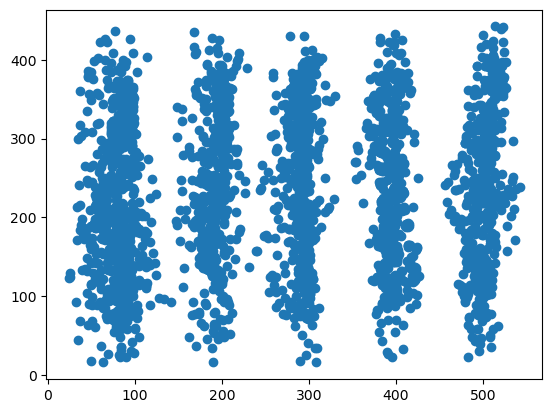

In [5]:
plt.scatter(data['x'], data['y'])
plt.show()

In [6]:
data1 = data.drop(['color'], axis = 1)
scaler = StandardScaler()
data1 = scaler.fit_transform(data1)
data1 = pd.DataFrame(data1, columns = ['x', 'y'])

C:\Users\Marcel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marcel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marcel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marcel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

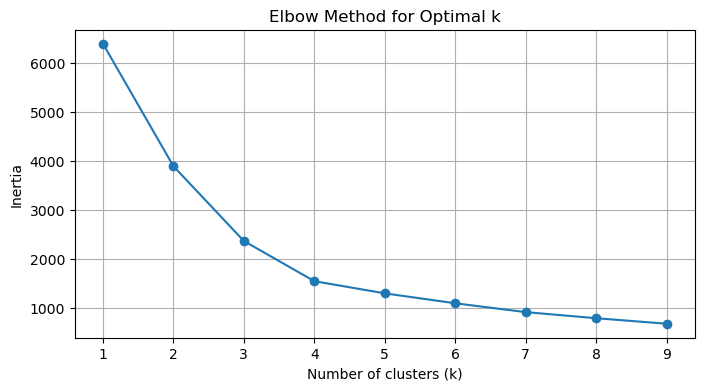

In [7]:
def elbow_method(data, k_range):
    inertia = [] # list to store the inertia values

    for k in k_range: # iterate over the range of k values
        kmeans = KMeans(n_clusters=k) # create a KMeans instance with k clusters
        kmeans.fit(data) # fit the data to the KMeans instance
        inertia.append(kmeans.inertia_) # append the inertia value to the inertia list
    plt.figure(figsize=(8, 4))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()
elbow_method(data1, range(1,10))

C:\Users\Marcel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


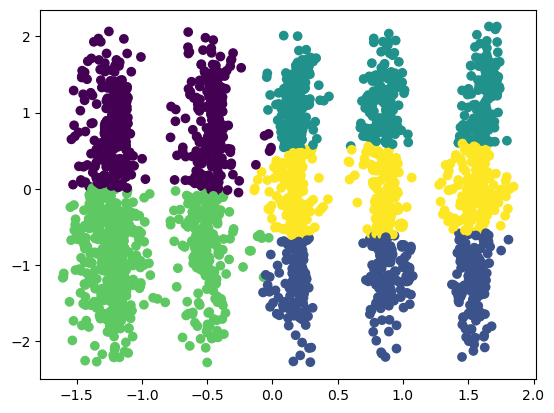

In [8]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data1)
plt.scatter(data1['x'], data1['y'], c = kmeans.labels_)
plt.show()

In [9]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

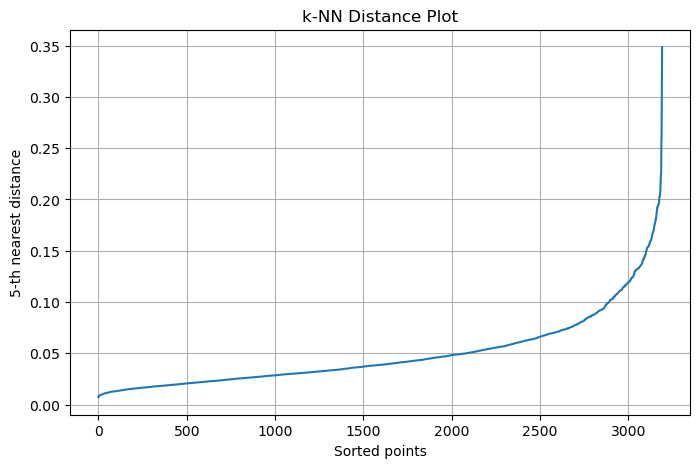

In [10]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(data1)
distances, indices = neigh.kneighbors(data1)

# Sort distances
distances = np.sort(distances[:, 5-1])  # Take the k-th distance for each point
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Sorted points")
plt.ylabel(f"{5}-th nearest distance")
plt.title("k-NN Distance Plot")
plt.grid(True)
plt.show()

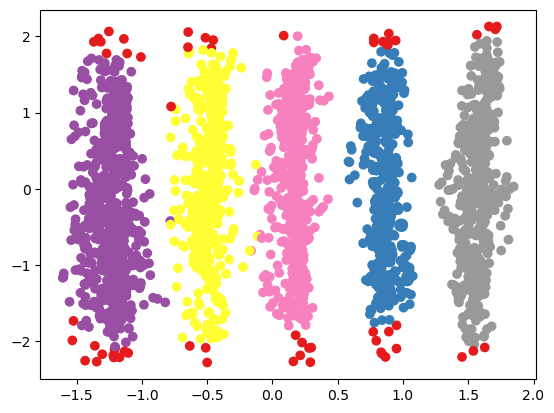

In [11]:
dbscan = DBSCAN(eps = 0.20, min_samples = 18)
dbscan.fit(data1)
plt.scatter(data1['x'], data1['y'], c = dbscan.labels_, cmap = "Set1")
plt.show()

In [12]:
from sklearn.metrics import adjusted_rand_score

# Assume you have a column of true labels and labels from the model
true_labels = data['color']  # Column with true labels
predicted_labels = dbscan.labels_  # Labels generated by the model

# Calculating ARI
ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index: {ari}")


Adjusted Rand Index: 0.9711430188063082
